In [1]:
#pip install networkx==2.4
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import MultipleLocator

In [2]:
N = 2000 #number of individuals
g=nx.erdos_renyi_graph(N, 0.4, seed=None, directed=False) #Generate a random network
rho = 0.05 #initial fraction infected
tau = 0.3 #infection rate
gamma = 0.5 #recovery rate

In [3]:
#Assume that people who have infected and cured still have the probability of being infected.
#Create a list to record the infected people
begin=list(np.random.choice(g.nodes(),size=round(len(g.nodes())*rho)))
#When people are infected, 'state'=1
#When people are not infected, 'state'=0
for i in range(0,len(begin)):
    g.nodes[begin[i]]['state']=1
#Create a list to store the number of infected people every day
infected=[len(begin)]
#Do the while-loop until everyone is not infected or cured.
while len(begin)>0:
    #Create a list to record the infected people that fail to be cured in this loop
    temp1=begin[:]
    #Create a list to record the infected people in this loop
    temp2=[]
    for m in range(0,len(begin)):
        neighbor=list(g.neighbors(begin[m]))
        for n in range(0,len(neighbor)):
            try:
                #Neighbor has already been infected
                if g.nodes[neighbor[n]]['state']==1:
                    continue
                #Neighbor has already been infected and cured
                if g.nodes[neighbor[n]]['state']==0:
                    if random.random()<=tau:
                        g.nodes[neighbor[n]]['state']=1
                        temp2.append(neighbor[n])
            except:
                #Neighbor has not been infected
                if random.random()<=tau:
                    g.nodes[neighbor[n]]['state']=1
                    temp2.append(neighbor[n])
        #Infected people in the previous loop have probability to be cured.
        if random.random()<=gamma:
            temp1.remove(begin[m])
    begin=temp1+temp2
    infected.append(len(begin))

Text(0, 0.5, 'Infected Rate')

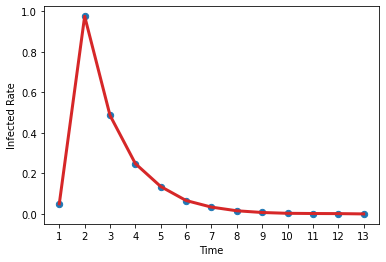

In [4]:
infected=np.array(infected)
infected_rate=infected/N
t=[]
for i in range(1,infected_rate.shape[0]+1):
    t.append(i)
plt.scatter(t, infected_rate, marker='o',s=40)
plt.plot(t, infected_rate, 'C3', lw=3, )
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel('Time')
plt.ylabel('Infected Rate')